In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
%matplotlib inline
import matplotlib.pyplot as plt
from rtree import index

#import models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# import lightgbm as lgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel, RBF
#from xgboost import XGBRegressor

from sklearn import model_selection
from sklearn.metrics import explained_variance_score
# from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pygad
import time
import datetime
import math

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from joblib import parallel_backend
import mkl
# mkl.set_num_threads(10)

In [2]:
datas = './MyData.xlsx'

In [3]:
df=pd.read_excel(datas)
df['logD'] = np.log10(df['diffusivity'])

In [4]:
df2=df[[ 'type', 'gas', 'aperture', 'MetalNum', 'MetalMass', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)', 'ionicRad', 
       'Μ-N_lff', 'Μ-N_kFF', 'MetalCharge',
       'apertureAtom_σ', 'apertureAtom_e', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',  
       'func2_mass', 'func3_mass', 'func1_charge', 'func2_charge',
       'func3_charge']]

In [5]:
df2=df2.rename(columns={'size - van der Waals (Å)':'diameter', 'size - kinetic diameter (Å)':'kdiameter', 'apertureAtom_e':'e' })

In [6]:
df2 = df2.dropna()
df2=df2.reset_index(drop=True)

In [7]:
x = np.asanyarray(df2[[
    'diameter',
    'mass',
    'ascentricF',
    'kdiameter',
    'ionicRad',
    'MetalNum',
    'MetalMass',
    'apertureAtom_σ',
    'e',
    'linker_length1', 'linker_length2', 'linker_length3',
    'linker_mass1', 'linker_mass2', 'linker_mass3',
    'func1_length', 'func2_length', 'func3_length', 
    'func1_mass', 'func2_mass', 'func3_mass',

                      ]])

y= np.array(df2[['logD']])

In [8]:
df2 = df2.dropna()
df2=df2.reset_index(drop=True)

In [9]:
TypeList = df.type.unique()

In [10]:
TypeList

array(['CdIF-1', 'ZIF-8', 'ZIF-Cu', 'ZIF-67', 'BeIF-1', 'ZIF-7-8',
       'Co-ZIF-7-8', 'Cl-ZIF-7-8', 'Br-ZIF-7-8', 'Be-ZIF-7-8', 'Br-ZIF-8',
       'Im-ZIF-8 (1)', 'Im-ZIF-8 (2)', 'Cd-Cl-ZIF-7-8', 'ZIF8_Mg',
       'ZIF8_Mn', 'Cd-Br-ZIF-7-8', 'Cl-ZIF-8', 'Im-ZIF-8 (3)',
       'Br-ZIF8-Co', 'Co-Br-ZIF-7-8', 'Co-Cl-ZIF-7-8', 'tetr-ZIF8',
       'tetr-ZIF8_Be', 'tetr-ZIF8_Co', 'I-ZIF-7-8', 'F-ZIF-7-8',
       'Co-F-ZIF-7-8', 'Be-F-ZIF-7-8', 'Cu-ZIF-7-8', 'Cu-F-ZIF-7-8',
       'Cu-Cl-ZIF-7-8', 'Cd-I-ZIF-7-8', 'Cd-I-ZIF-7-9', 'Cd-I-ZIF-7-10',
       'Co-I-ZIF-7-8', 'NH2-tetrz', 'NH2_tetrz_Be', 'NH2-tetrz_Co',
       'dClm_Zn', 'dClm_Co', 'dClm_Be', 'dClm_Cd', 'dClm_Mg',
       'Be-I-ZIF-7-8', 'CHO_Zn', 'tetr-ZIF8_Cu', 'dClm_Cu', 'dFm_Zn',
       'dBrm_Zn', 'dIm_Zn', 'Cu-Br-zif-7-8', 'Cu-I-zif-7-8', 'Mg-zif-7-8',
       'Mg-Br-zif-7-8', 'Mg-I-zif-7-8', 'Mn-zif-7-8', 'Mn-Br-zif-7-8',
       'Mn-I-zif-7-8', 'dBrm_Be', 'dBrm_Co', 'dBrm_Cu', 'dBrm_Cd',
       'dBrm_Mg', 'dFm_Co', 'dFm_Cd', 'd

In [11]:
TypeList[0]

# df2[(df2['type'] == 'dFm_Be')]

df2[(df2['type'] == TypeList[3])]

,type,gas,aperture,MetalNum,MetalMass,diameter,mass,ascentricF,logD,kdiameter,...,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge
49,ZIF-67,He,3.32,27,58.93,2.66,4.0020,-0.390,-7.872895,2.60,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
50,ZIF-67,H2,3.32,27,58.93,2.76,2.0100,-0.217,-8.060481,2.89,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
51,ZIF-67,O2,3.32,27,58.93,2.94,31.9990,0.022,-9.010105,3.46,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
52,ZIF-67,CO2,3.32,27,58.93,3.24,44.0100,0.225,-9.352617,3.30,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
53,ZIF-67,NO2,3.32,27,58.93,3.22,46.0055,0.834,-10.003926,3.30,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
54,ZIF-67,N2,3.32,27,58.93,3.13,28.0000,0.037,-9.602060,3.64,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
55,ZIF-67,CH4,3.32,27,58.93,3.25,16.0400,0.011,-11.364516,3.80,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
56,ZIF-67,ethylene,3.32,27,58.93,3.59,28.0500,0.087,-10.698970,3.90,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
57,ZIF-67,ethane,3.32,27,58.93,3.72,30.0700,0.099,-11.397940,4.00,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342
58,ZIF-67,SO2,3.32,27,58.93,3.55,64.0660,0.251,-12.787812,4.10,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1342,-0.1342,-0.1342


In [12]:
df_a = df2[(df2['type'] == TypeList[3])] 
df_b = df2[(df2['type'] == TypeList[4])]

new = pd.concat([df_a, df_b], axis=0, ignore_index=True)
# new

In [13]:
# for i in range(0, len(TypeList)):
newDf = df2[(df2['type'] == TypeList[0])]

for i in range(1, 3):
    df_b = df2[(df2['type'] == TypeList[i])]
    newDf = pd.concat([newDf, df_b], axis=0, ignore_index=True)
    # print(TypeList[i])

In [14]:
newDf

,type,gas,aperture,MetalNum,MetalMass,diameter,mass,ascentricF,logD,kdiameter,...,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge
0,CdIF-1,He,3.92,48,112.411,2.66,4.0020,-0.390,-7.221849,2.60,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
1,CdIF-1,H2,3.92,48,112.411,2.76,2.0100,-0.217,-7.301030,2.89,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
2,CdIF-1,O2,3.92,48,112.411,2.94,31.9990,0.022,-8.000000,3.46,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
3,CdIF-1,CO2,3.92,48,112.411,3.24,44.0100,0.225,-8.397940,3.30,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
4,CdIF-1,N2,3.92,48,112.411,3.13,28.0000,0.037,-8.301030,3.64,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
5,CdIF-1,CH4,3.92,48,112.411,3.25,16.0400,0.011,-8.585027,3.80,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
6,CdIF-1,ethylene,3.92,48,112.411,3.59,28.0500,0.087,-9.236572,3.90,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
7,CdIF-1,ethane,3.92,48,112.411,3.72,30.0700,0.099,-9.197226,4.00,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
8,CdIF-1,propylene,3.92,48,112.411,4.03,42.0800,0.142,-9.667562,4.50,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
9,CdIF-1,propane,3.92,48,112.411,4.16,44.1000,0.152,-10.677781,4.30,...,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001


In [15]:
TypeList[1]

'ZIF-8'

In [16]:
new_array = np.delete(TypeList, 3)
new_array[3]

'BeIF-1'

In [17]:
new_array

array(['CdIF-1', 'ZIF-8', 'ZIF-Cu', 'BeIF-1', 'ZIF-7-8', 'Co-ZIF-7-8',
       'Cl-ZIF-7-8', 'Br-ZIF-7-8', 'Be-ZIF-7-8', 'Br-ZIF-8',
       'Im-ZIF-8 (1)', 'Im-ZIF-8 (2)', 'Cd-Cl-ZIF-7-8', 'ZIF8_Mg',
       'ZIF8_Mn', 'Cd-Br-ZIF-7-8', 'Cl-ZIF-8', 'Im-ZIF-8 (3)',
       'Br-ZIF8-Co', 'Co-Br-ZIF-7-8', 'Co-Cl-ZIF-7-8', 'tetr-ZIF8',
       'tetr-ZIF8_Be', 'tetr-ZIF8_Co', 'I-ZIF-7-8', 'F-ZIF-7-8',
       'Co-F-ZIF-7-8', 'Be-F-ZIF-7-8', 'Cu-ZIF-7-8', 'Cu-F-ZIF-7-8',
       'Cu-Cl-ZIF-7-8', 'Cd-I-ZIF-7-8', 'Cd-I-ZIF-7-9', 'Cd-I-ZIF-7-10',
       'Co-I-ZIF-7-8', 'NH2-tetrz', 'NH2_tetrz_Be', 'NH2-tetrz_Co',
       'dClm_Zn', 'dClm_Co', 'dClm_Be', 'dClm_Cd', 'dClm_Mg',
       'Be-I-ZIF-7-8', 'CHO_Zn', 'tetr-ZIF8_Cu', 'dClm_Cu', 'dFm_Zn',
       'dBrm_Zn', 'dIm_Zn', 'Cu-Br-zif-7-8', 'Cu-I-zif-7-8', 'Mg-zif-7-8',
       'Mg-Br-zif-7-8', 'Mg-I-zif-7-8', 'Mn-zif-7-8', 'Mn-Br-zif-7-8',
       'Mn-I-zif-7-8', 'dBrm_Be', 'dBrm_Co', 'dBrm_Cu', 'dBrm_Cd',
       'dBrm_Mg', 'dFm_Co', 'dFm_Cd', 'dFm_Mg', 'd

In [18]:
XGBR = XGBRegressor(n_estimators=500, max_depth=5, eta=0.07, subsample=0.75, colsample_bytree=0.7, reg_lambda=0.4, reg_alpha=0.13,
                    # n_jobs=6,
                    nthread=6,
                    random_state=6410
                   )

In [19]:

TrainArray = np.delete(TypeList, 0)
TestArray = TypeList[0]

newDf = df2[(df2['type'] == TrainArray[0])]

data_y,data_yhat_XGBR, r2_list = list(), list(), list()
for i in range(1, len(TrainArray)):
    df_b = df2[(df2['type'] == TrainArray[i])]
    newDf = pd.concat([newDf, df_b], axis=0, ignore_index=True)

    testdf = df2[(df2['type'] == TestArray)]

    x_train = np.asanyarray(newDf[[
                            'diameter','mass','ascentricF', 'kdiameter','ionicRad',
                            'MetalNum','MetalMass',
                            'apertureAtom_σ',
                            'e',
                            'linker_length1', 'linker_length2', 'linker_length3',
                            'linker_mass1', 'linker_mass2', 'linker_mass3',
                            'func1_length', 'func2_length', 'func3_length', 
                            'func1_mass', 'func2_mass', 'func3_mass'
                                            ]])
    y_train= np.array(newDf[['logD']])

    x_test = np.asanyarray(testdf[[
                            'diameter','mass','ascentricF', 'kdiameter','ionicRad',
                            'MetalNum','MetalMass',
                            'apertureAtom_σ',
                            'e',
                            'linker_length1', 'linker_length2', 'linker_length3',
                            'linker_mass1', 'linker_mass2', 'linker_mass3',
                            'func1_length', 'func2_length', 'func3_length', 
                            'func1_mass', 'func2_mass', 'func3_mass'
                                            ]])
    y_test= np.array(testdf[['logD']])

    #train
    XGBR.fit(x_train, y_train.ravel())
    #make predictions
    yhat_XGBR = XGBR.predict(x_test)
    #store
    # data_y.extend(y_test)
    # data_yhat_XGBR.extend(yhat_XGBR)

    # R2_XGBR = (metrics.r2_score(data_y, data_yhat_XGBR))
    R2_XGBR = (metrics.r2_score(y_test, yhat_XGBR))
    r2_list.append(R2_XGBR)




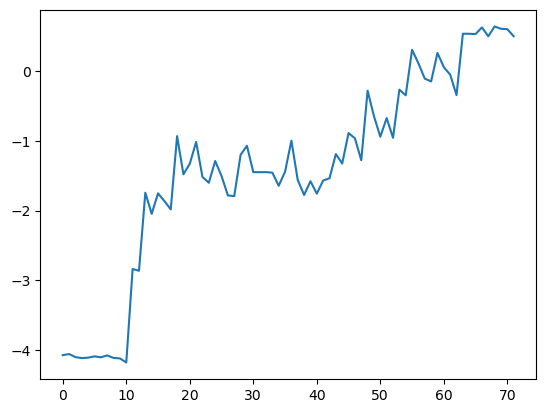

In [20]:
r2_list
Table=pd.DataFrame(data = r2_list)
Table

plt.plot(Table)

In [21]:
result_df = pd.DataFrame()  # Create an empty dataframe

for i in range(len(TypeList)):
# for i in range(0, 3):
    TrainArray = np.delete(TypeList, i)
    TestArray = TypeList[i]

    newDf = df2[(df2['type'] == TrainArray[0])]

    # data_y,data_yhat_XGBR, r2_list = list(), list(), list()
    r2_list = []
    mae_list = []
    error_list = []
    for j in range(1, len(TrainArray)):
    # for j in range(len(TrainArray)):
    # for j in range(1, 3):
        # if j == i:
        #     continue # Skip the iteration where TrainArray[j] matches TestArray
 
        df_b = df2[(df2['type'] == TrainArray[j])]
        newDf = pd.concat([newDf, df_b], axis=0, ignore_index=True)

        testdf = df2[(df2['type'] == TestArray)]
    
        if newDf.empty or testdf.empty:
            mae_list.append(np.nan)
            continue

        x_train = np.asanyarray(newDf[[
                                'diameter','mass','ascentricF', 'kdiameter','ionicRad',
                                'MetalNum','MetalMass',
                                'apertureAtom_σ',
                                'e',
                                'linker_length1', 'linker_length2', 'linker_length3',
                                'linker_mass1', 'linker_mass2', 'linker_mass3',
                                'func1_length', 'func2_length', 'func3_length', 
                                'func1_mass', 'func2_mass', 'func3_mass'
                                                ]])
        y_train= np.array(newDf[['logD']])

        x_test = np.asanyarray(testdf[[
                                'diameter','mass','ascentricF', 'kdiameter','ionicRad',
                                'MetalNum','MetalMass',
                                'apertureAtom_σ',
                                'e',
                                'linker_length1', 'linker_length2', 'linker_length3',
                                'linker_mass1', 'linker_mass2', 'linker_mass3',
                                'func1_length', 'func2_length', 'func3_length', 
                                'func1_mass', 'func2_mass', 'func3_mass'
                                                ]])
        y_test= np.array(testdf[['logD']])

        #train
        XGBR.fit(x_train, y_train.ravel())
        #make predictions
        yhat_XGBR = XGBR.predict(x_test)
        #store
        # R2_XGBR = (metrics.r2_score(y_test, yhat_XGBR))
        # r2_list.append(R2_XGBR)

        # mse = metrics.mean_squared_error(y_test, yhat_XGBR)
        mae = metrics.mean_absolute_error(y_test, yhat_XGBR)
        mae_list.append(mae)

        # error_m = abs((y_test - yhat_XGBR))
        print("This is zif {}".format(j))
        print(mae)
        # error_list.append(error_m)
        # print(mae_list)
        

    # df_{i} = pd.DataFrame(data = r2_list)
    col_name = f"Column_{i}"  # Generate a column name based on the iteration number
    # result_df[col_name] = r2_list  # Add the list as a new column to the dataframe
    result_df[col_name] = mae_list  # Add the list as a new column to the dataframe
    print("This is round {}".format(i))
    # print(error_list)
    

# Print the resulting dataframe
# print(result_df)       



This is zif 1
2.0883115734454742
This is zif 2
2.0881591217940376
This is zif 3
2.0949553796305156
This is zif 4
2.0926054239354994
This is zif 5
2.0926012005206696
This is zif 6
2.090964048257573
This is zif 7
2.091754371787498
This is zif 8
2.085411075191516
This is zif 9
2.09678330081669
This is zif 10
2.0992991617829637
This is zif 11
2.1064529453087033
This is zif 12
1.7191587657647116
This is zif 13
1.6859551639275534
This is zif 14
1.3178080291466696
This is zif 15
1.4978423493331
This is zif 16
1.3970407451984042
This is zif 17
1.3878038070942316
This is zif 18
1.4191303053983262
This is zif 19
1.091492236863106
This is zif 20
1.2913492548524974
This is zif 21
1.239339491307413
This is zif 22
1.1878990927823594
This is zif 23
1.39218284113659
This is zif 24
1.3058941505695734
This is zif 25
1.2246265212186387
This is zif 26
1.3420616359429343
This is zif 27
1.4319903310766884
This is zif 28
1.3962030211576035
This is zif 29
1.211759662127737
This is zif 30
1.1867053776232552
Th

In [22]:
result_df['Average'] = result_df.mean(axis=1)
print(result_df)
# print(mae_list)

    Column_0  Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  \
0   2.088312  2.277251  1.887858  0.968976  8.303928  4.574135  4.917224   
1   2.088159  1.793786  1.242934  0.965405  6.437057  4.579887  3.454399   
2   2.094955  1.618358  1.369859  0.974732  6.760766  4.575772  4.276085   
3   2.092605  2.408196  1.328709  0.966720  6.757926  4.574946  4.278193   
4   2.092601  1.742331  1.330767  2.134092  6.715607  1.522361  0.479339   
..       ...       ...       ...       ...       ...       ...       ...   
67  0.557411  0.727048  1.142836  0.782062  4.697922  2.800230  2.959550   
68  0.472721  0.731764  1.081091  0.760521  4.315487  2.508289  2.728224   
69  0.491780  0.708825  1.113468  0.656541  3.526203  2.921083  2.963178   
70  0.469832  0.662532  1.303078  0.669585  4.470034  3.188009  3.198824   
71  0.496295  0.711599  1.149367  0.839671  4.634875  2.749321  2.793744   

    Column_7  Column_8   Column_9  ...  Column_65  Column_66  Column_67  \
0   8.058802

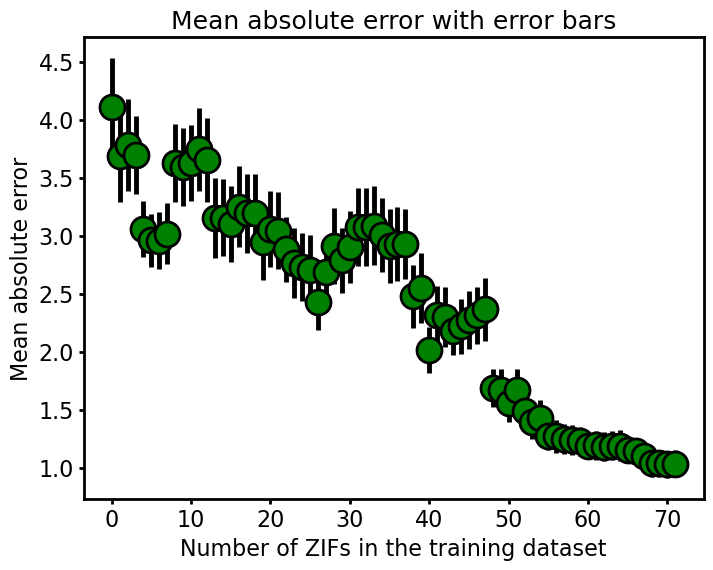

In [25]:
import matplotlib.pyplot as plt


x = range(len(result_df))
y = result_df['Average']
error = result_df.std(axis=1) / math.sqrt(result_df.shape[0]) # Calculate the standard deviation as the error

# plt.scatter(x, y)
plt.errorbar(x, y, yerr=error, ecolor='k', fmt='o', c='g', markersize='18', linewidth=3.5, markeredgecolor='k', markeredgewidth=2)
# plt.yscale("log")
plt.xlabel('Number of ZIFs in the training dataset', fontsize=16)
plt.ylabel('Mean absolute error', fontsize=16)
plt.title('Mean absolute error with error bars', fontsize=18)
plt.rcParams["figure.figsize"] = (8,6)

plt.tick_params(which='both', width=2)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.rcParams['axes.linewidth'] = 2

plt.savefig('validation_DataSetSize.png', bbox_inches='tight')
plt.show()

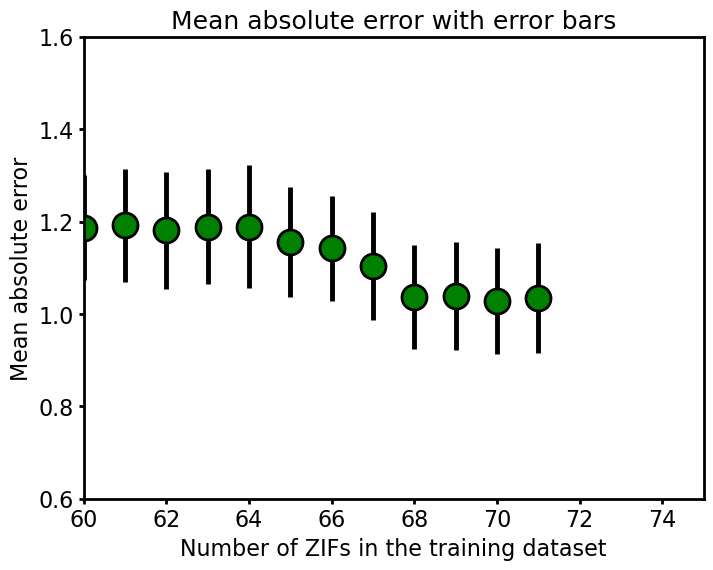

In [29]:
import matplotlib.pyplot as plt


x = range(len(result_df))
y = result_df['Average']
error = result_df.std(axis=1) / math.sqrt(result_df.shape[0]) # Calculate the standard deviation as the error

# plt.scatter(x, y)
plt.errorbar(x, y, yerr=error, ecolor='k', fmt='o', c='g', markersize='18', linewidth=3.5, markeredgecolor='k', markeredgewidth=2)
# plt.yscale("log")
plt.xlabel('Number of ZIFs in the training dataset', fontsize=16)
plt.ylabel('Mean absolute error', fontsize=16)
plt.title('Mean absolute error with error bars', fontsize=18)
plt.rcParams["figure.figsize"] = (8,6)

plt.tick_params(which='both', width=2)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.rcParams['axes.linewidth'] = 2

plt.ylim(0.6, 1.6)
plt.xlim(60, 75)

plt.savefig('validation_DataSetSize_zoom.png', bbox_inches='tight')
plt.show()

c:\Users\pkrok\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\pkrok\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


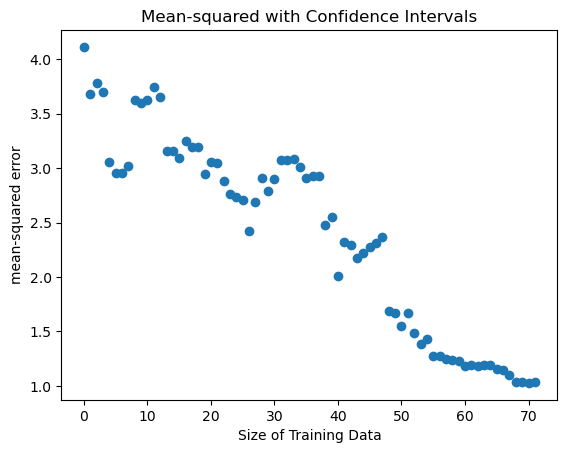

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = range(len(result_df))
y = result_df['Average']
confidence = 0.95  # Confidence level (e.g., 95%)

errors = []
for row in result_df.iterrows():
    values = row[1].values
    mean = np.mean(values)
    std_err = stats.sem(values)
    margin = std_err * stats.t.ppf((1 + confidence) / 2, len(values) - 1)
    errors.append(margin)

plt.errorbar(x, y, yerr=errors, fmt='o')
plt.xlabel('Size of Training Data')
plt.ylabel('mean-squared error')
plt.title('Mean-squared with Confidence Intervals')
plt.show()

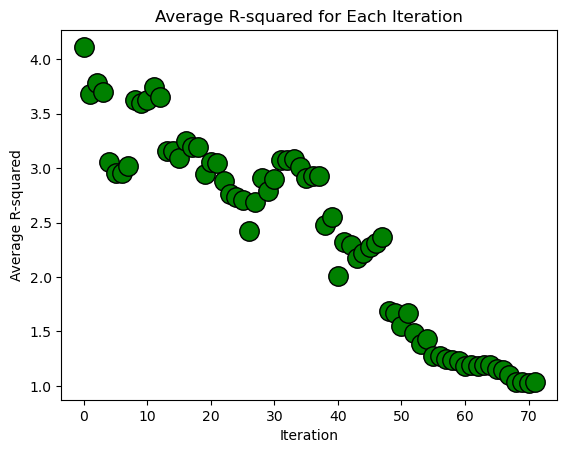

In [107]:
x = range(len(result_df))
y = result_df['Average']

plt.plot(x, y, 'o', label='LR', c='g', markersize='14', linewidth=2, markeredgecolor='k')
plt.xlabel('Iteration')
plt.ylabel('Average R-squared')
plt.title('Average R-squared for Each Iteration')
plt.show()

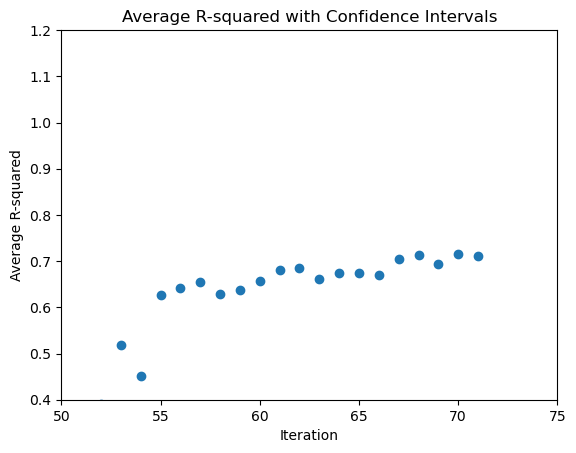

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = range(len(result_df))
y = result_df['Average']
confidence = 0.95  # Confidence level (e.g., 95%)

errors = []
for row in result_df.iterrows():
    values = row[1].values
    mean = np.mean(values)
    std_err = stats.sem(values)
    margin = std_err * stats.t.ppf((1 + confidence) / 2, len(values) - 1)
    errors.append(margin)

plt.errorbar(x, y, yerr=errors, fmt='o')
plt.ylim(0.4, 1.2)
plt.xlim(50, 75)
plt.xlabel('Iteration')
plt.ylabel('Average R-squared')
plt.title('Average R-squared with Confidence Intervals')
plt.show()

0.715779306791093